In [4]:
import numpy as np
from scipy.stats import nbinom, beta
import matplotlib.pyplot as plt

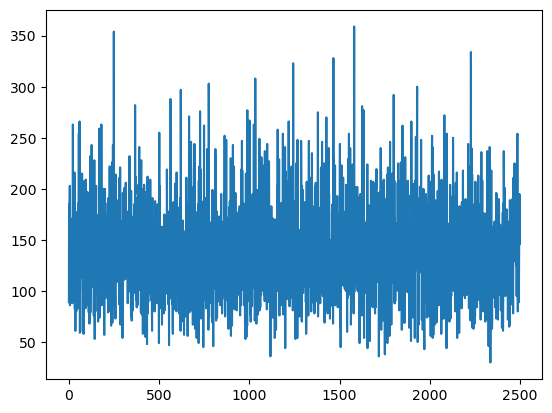

In [11]:
clm = 2500
m = 20

alpha = 0.2
r = 10

J = beta(clm - alpha, m * r + alpha).rvs()
qrs = nbinom.rvs(r, 1-J, size=2500)
plt.plot(qrs)

In [45]:
def sample_bnb_seq(sigma, r=10, ndata=10000):
    out = np.zeros(ndata)
    out[0] = 10
    cnt = out[0]
    for i in range(1, ndata):
        p = beta.rvs(cnt - sigma, 1 + r*i)
        out[i] = nbinom.rvs(r, 1-p)
        cnt += out[i]
    return out

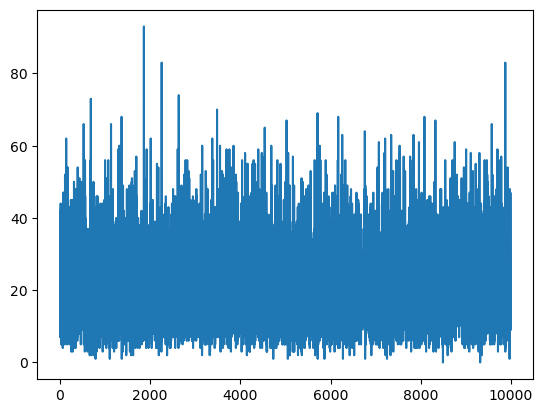

In [46]:
plt.plot(sample_bnb_seq(0.5, 5))

<BarContainer object of 50 artists>

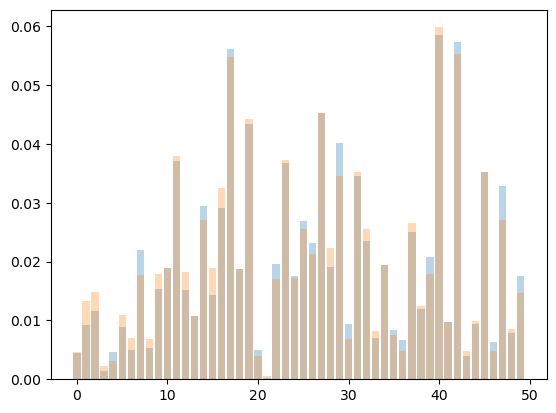

In [66]:
M = 50
gammas = tfd.Gamma(2, 2).sample(M)
gamma_norm = gammas / gammas.sum()

L = 5000
s = tfd.Gamma(2, 2).sample(L)
s_norm = s / s.sum()
t_alloc = tfd.Categorical(probs=gamma_norm).sample(L)

ndata = 50000000
c_alloc = tfd.Categorical(probs=s_norm).sample(ndata)

uniqs, cnts = np.unique(t_alloc[c_alloc], return_counts=True)

plt.bar(uniqs, cnts / cnts.sum(), alpha=0.3)
plt.bar(np.arange(M), gamma_norm, alpha=0.3)

<BarContainer object of 10 artists>

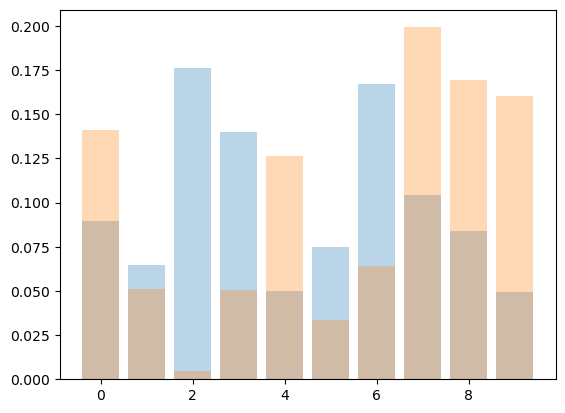